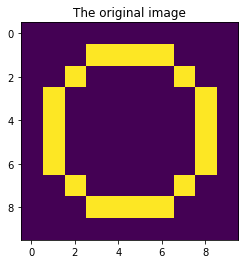

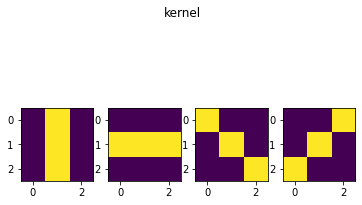

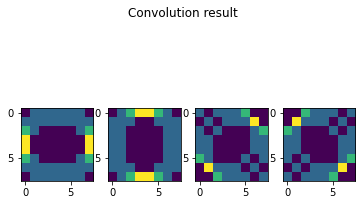

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
%matplotlib inline

# 간단한 합성곱층 정의


class Conv:
    def __init__(self, W):
        self.W = W

    def f_prop(self, X):
        out = np.zeros((X.shape[0]-2, X.shape[1]-2))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                x = X[i:i+3, j:j+3]
                out[i, j] = np.dot(self.W.flatten(), x.flatten())
        return out


local_filename, headers = urllib.request.urlretrieve(
    'https://aidemystorageprd.blob.core.windows.net/data/5100_cnn_data/circle.npy')
X = np.load(local_filename)

plt.imshow(X)
plt.title("The original image", fontsize=12)
plt.show()

W1 = np.array([[0, 1, 0],
               [0, 1, 0],
               [0, 1, 0]])
W2 = np.array([[0, 0, 0],
               [1, 1, 1],
               [0, 0, 0]])
W3 = np.array([[1, 0, 0],
               [0, 1, 0],
               [0, 0, 1]])
W4 = np.array([[0, 0, 1],
               [0, 1, 0],
               [1, 0, 0]])

plt.subplot(1, 4, 1)
plt.imshow(W1)
plt.subplot(1, 4, 2)
plt.imshow(W2)
plt.subplot(1, 4, 3)
plt.imshow(W3)
plt.subplot(1, 4, 4)
plt.imshow(W4)
plt.suptitle("kernel", fontsize=12)
plt.show()

conv1 = Conv(W1)
C1 = conv1.f_prop(X)
conv2 = Conv(W2)
C2 = conv2.f_prop(X)
conv3 = Conv(W3)
C3 = conv3.f_prop(X)
conv4 = Conv(W4)
C4 = conv4.f_prop(X)

plt.subplot(1, 4, 1)
plt.imshow(C1)
plt.subplot(1, 4, 2)
plt.imshow(C2)
plt.subplot(1, 4, 3)
plt.imshow(C3)
plt.subplot(1, 4, 4)
plt.imshow(C4)
plt.suptitle("Convolution result", fontsize=12)
plt.show()

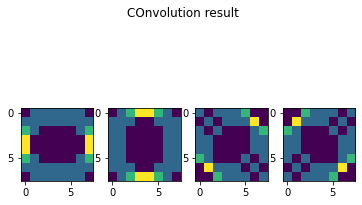

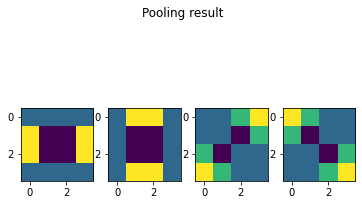

In [8]:
# 간단한 풀링층 정의
class Pool:
    def __init__(self, l):
        self.l = l
    
    def f_prop(self, X):
        l = self.l
        out = np.zeros((X.shape[0]//self.l, X.shape[1]//self.l))
        for i in range(out.shape[0]):
            for j in range(out.shape[1]):
                out[i, j] = np.max(X[i*l:(i+1)*l, j*l:(j+1)*l])
        return out

conv1 = Conv(W1); C1 = conv1.f_prop(X)
conv2 = Conv(W2); C2 = conv2.f_prop(X)
conv3 = Conv(W3); C3 = conv3.f_prop(X)
conv4 = Conv(W4); C4 = conv4.f_prop(X)

plt.subplot(1, 4, 1); plt.imshow(C1)
plt.subplot(1, 4, 2); plt.imshow(C2)
plt.subplot(1, 4, 3); plt.imshow(C3)
plt.subplot(1, 4, 4); plt.imshow(C4)
plt.suptitle("COnvolution result", fontsize=12)
plt.show()

pool = Pool(2)
P1 = pool.f_prop(C1)
P2 = pool.f_prop(C2)
P3 = pool.f_prop(C3)
P4 = pool.f_prop(C4)

plt.subplot(1, 4, 1); plt.imshow(P1)
plt.subplot(1, 4, 2); plt.imshow(P2)
plt.subplot(1, 4, 3); plt.imshow(P3)
plt.subplot(1, 4, 4); plt.imshow(P4)
plt.suptitle("Pooling result", fontsize=12)
plt.show()

In [11]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical

model = Sequential()
model.add(Conv2D(input_shape=(28, 28, 1),
                 filters=32,
                 kernel_size=(2, 2),
                 strides=(1, 1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(1, 1)))
model.add(Conv2D(filters=32,
                 kernel_size=(2, 2),
                 strides=(1, 1),
                 padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(1, 1)))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense (Dense)               (None, 256)              

4/4 [==============================] - 0s 6ms/step - loss: 2.5094 - accuracy: 0.1100
Test loss: 2.5094025135040283
Test accuracy: 0.10999999940395355


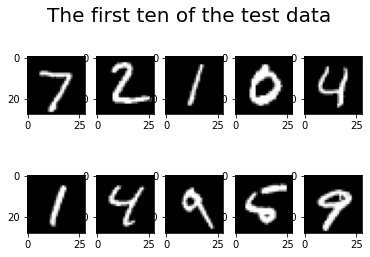

1/1 [==============================] - 0s 95ms/step
[3 3 3 3 3 3 3 3 3 3]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                              

In [12]:
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train[:300].reshape(-1, 28, 28, 1)
X_test = X_test[:100].reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)[:300]
y_test = to_categorical(y_test)[:100]

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {scores[0]}")
print(f"Test accuracy: {scores[1]}")

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), "gray")
plt.suptitle("The first ten of the test data", fontsize=20)
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)

model.summary()